In [1]:
cd ..

/home/boc7rng/ros2_ws/src/tracetools_analysis/tracetools_analysis


In [2]:
import sys
import pickle
import matplotlib.pyplot as plt
from tracetools_analysis.analysis import load
from tracetools_analysis.analysis import ros2_processor

In [3]:
# Load an process
pickle_filename = '../../../the_pickle_file'
events = load.load_pickle(pickle_filename)
processor = ros2_processor.ros2_process(events)
data_model = processor.get_data_model()

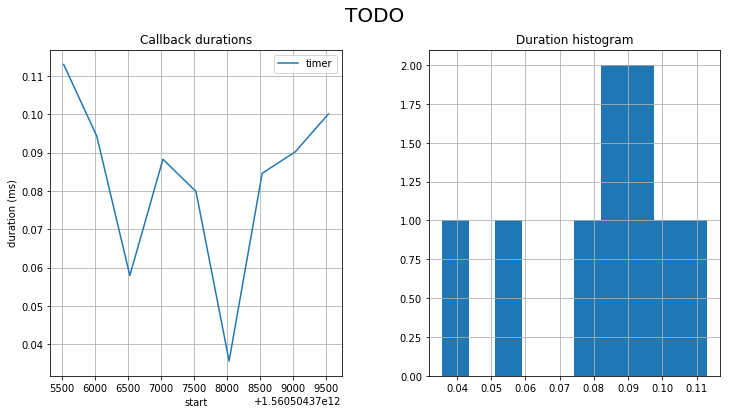

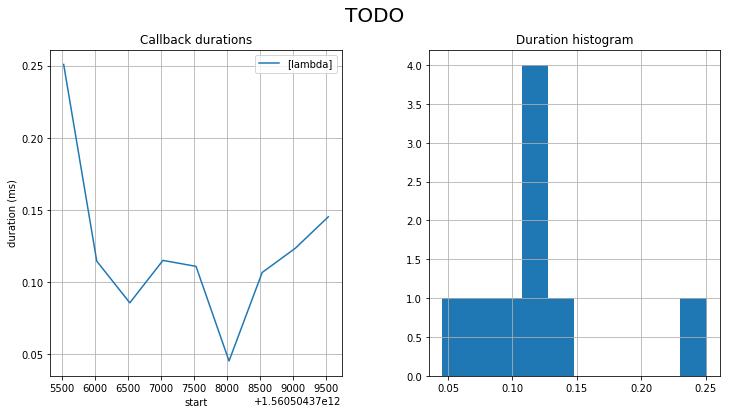

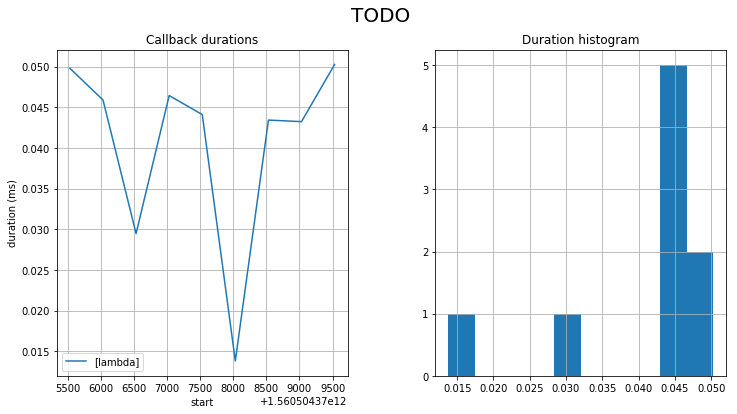

In [4]:
callback_instances = data_model.callback_instances
callback_symbols = data_model.callback_symbols

# Get a list of callback objects
callback_objects = set(callback_instances['callback_object'])
# Get their symbol
symbols = {obj: callback_symbols.loc[obj, 'symbol'] for obj in callback_objects}

# Plot durations
for obj in callback_objects:
    duration_ns = callback_instances.loc[callback_instances.loc[:, 'callback_object'] == obj, :]
    duration_ms = duration_ns.apply(lambda d: d/1000000.0)

    fig = plt.figure(figsize=(12, 6))
    fig.suptitle('TODO', fontsize=20)

    ax = fig.add_subplot(1, 2, 1)
    duration_ms.plot(x='timestamp', y='duration', ax=ax)
    ax.legend([str(symbols.get(obj, 'unknown'))])
    ax.set_xlabel('start')
    ax.set_ylabel('duration (ms)')
    ax.title.set_text('Callback durations')
    ax.grid()

    ax = fig.add_subplot(1, 2, 2)
    duration_ms.hist(column='duration', ax=ax)
    ax.title.set_text('Duration histogram')

    plt.show()